In [43]:
%matplotlib inline

import numpy as np
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
import glob
import os

In [44]:
curpath = os.path.abspath('.')                  
biasFolder = os.path.join(curpath, 'bias')   

In [45]:
biasList = glob.glob(os.path.join(biasFolder,'*fits'))

numBiasFiles = len(biasList)


In [46]:
biasImages = np.zeros((4108, 4096, numBiasFiles))

for i in range(numBiasFiles):
        biasImages[:,:,i] = fits.open(biasList[i])[0].data
        

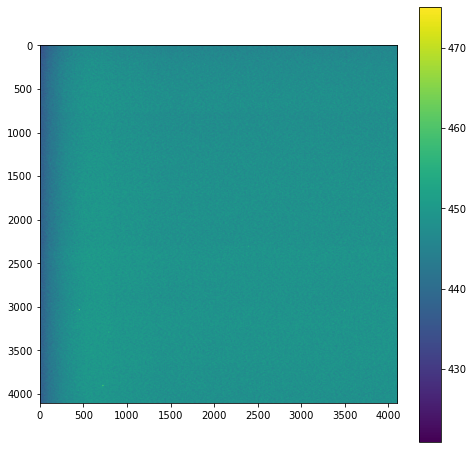

In [47]:
mean, median, std = sigma_clipped_stats(biasImages[:,:,0])

plt.figure(figsize=(8,8))
plt.imshow(biasImages[:,:,0], vmin = median - 3*std, vmax = median + 3*std)
plt.colorbar()

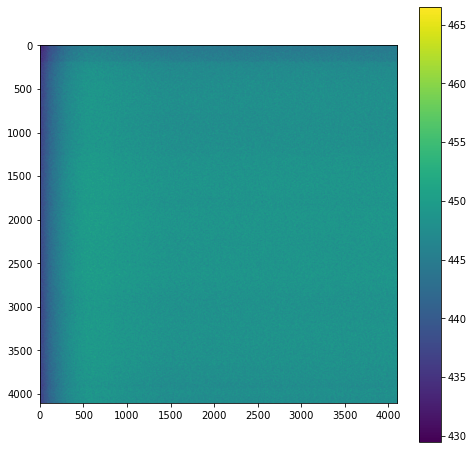

In [48]:
masterBias = np.median(biasImages, axis=2)

mean, median, std = sigma_clipped_stats(masterBias)

plt.figure(figsize=(8,8))
plt.imshow(masterBias, vmin = median - 3*std, vmax = median + 3*std)
plt.colorbar()

In [49]:
Flat = fits.open('Flat.fits')[1].data

masterFlat = Flat - masterBias
master_flat_median = np.median(masterFlat)

# This re-scaling is so that we get a reasonable range in the final processed image. 
masterFlat = masterFlat/master_flat_median

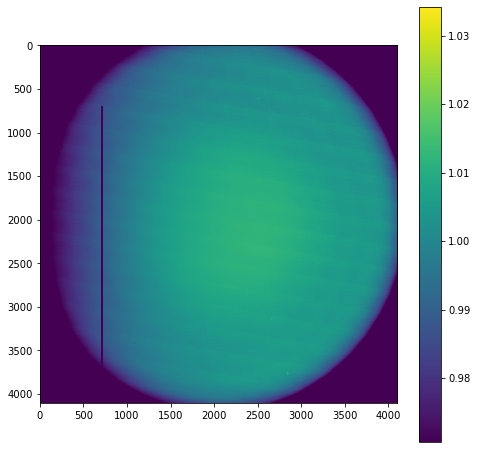

In [50]:
mean, median, std = sigma_clipped_stats(masterFlat)
plt.figure(figsize=(8,8))
plt.imshow(masterFlat, vmin = median - 3*std, vmax = median + 3*std)
plt.colorbar()

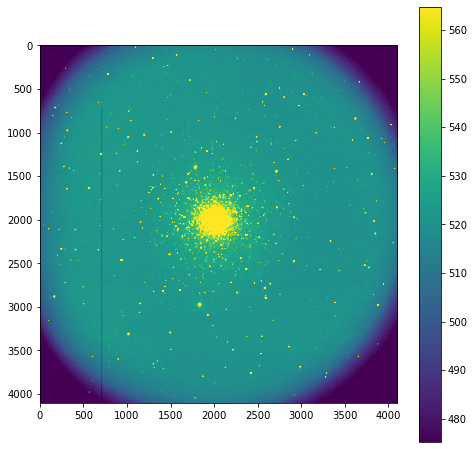

In [59]:
rawHDU = fits.open('Messier3_raw.fits')[0]
rawData = rawHDU.data

# Let us have a look at the image:
plt.figure(figsize = (8,8))
mean, median, std = sigma_clipped_stats(rawData)
plt.imshow(rawData, vmin = median - 3*std, vmax = median + 3*std)
plt.colorbar()

In [60]:
rawHeader = rawHDU.header

procData = (rawData - masterBias) / masterFlat

procHDU = fits.PrimaryHDU(procData)
procHDU.header = rawHeader

procHDU.writeto('Messier3.proc2.fits', overwrite=True)

M3_HDU = fits.open('Messier3.proc2.fits')[0]
M3_data = M3_HDU.data

plt.figure(figsize = (8,8))
mean, median, std = sigma_clipped_stats(M3_data)
plt.imshow(M3_data, vmin = median - 3*std, vmax = median + 3*std, origin = "lower")
plt.colorbar()

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'Messier3.proc2.fits'

In [61]:
def get_background_histogram(array, min_count, max_count):
    """
        array is the numpy array that contains the counts for each pixel
        the bins for the histogram will be np.arange(min_count, max_count, 1)
    """
    flattened_array = array.flatten()
    num_pixels, bin_edges = np.histogram(flattened_array, bins=np.arange(min_count, max_count, 1))
    bins = 0.5*(bin_edges[1:] + bin_edges[:-1])
    return bins, num_pixels

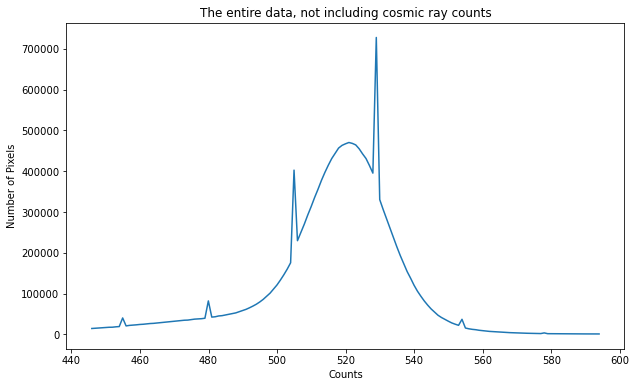

In [62]:
vmin = median - 5*std
vmax = median + 5*std
bins, num_pixels = get_background_histogram(rawData,vmin,vmax) #entire data, not including cosmic ray counts

plt.figure(figsize = (10,6))
plt.title("The entire data, not including cosmic ray counts")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.plot(bins, num_pixels)
m3_data = rawData

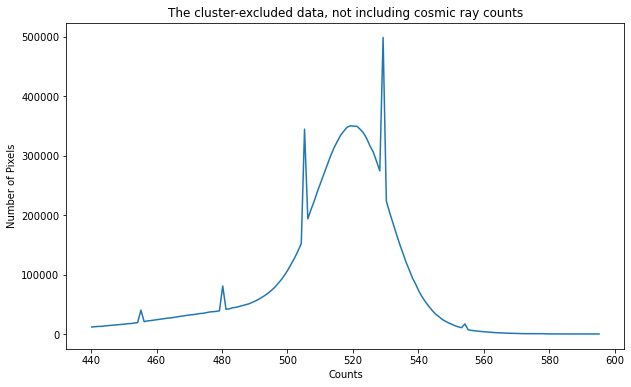

In [63]:
pixels_without_cluster = np.concatenate([m3_data[:1000, :], m3_data[3000:, :], m3_data[1000:3000, :1000], m3_data[1000:3000, 3000:]], axis=None)

bkg_mean, bkg_median, bkg_std = sigma_clipped_stats(pixels_without_cluster)
min_count = bkg_median - 5*bkg_std
max_count = bkg_median + 5*bkg_std
bins_bkg, num_pixels_bkg = get_background_histogram(pixels_without_cluster, min_count, max_count)
plt.figure(figsize = (10,6))
plt.title("The cluster-excluded data, not including cosmic ray counts")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')

plt.plot(bins_bkg, num_pixels_bkg)

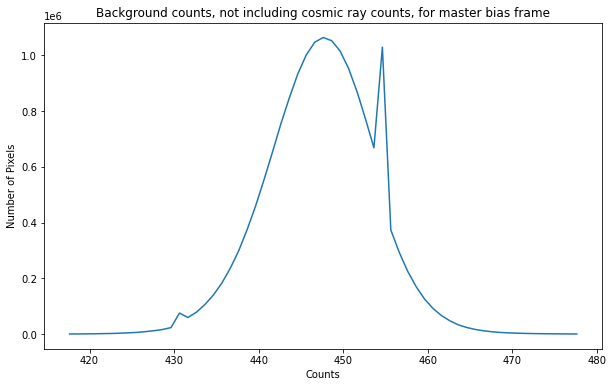

In [64]:
mean, median, std = sigma_clipped_stats(masterBias)
bins, num_pixels = get_background_histogram(masterBias,median - 5*std, median + 5*std) #background counts, not including cosmic ray counts
plt.figure(figsize = (10,6))
plt.title("Background counts, not including cosmic ray counts, for master bias frame")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.plot(bins, num_pixels)
plt.show()

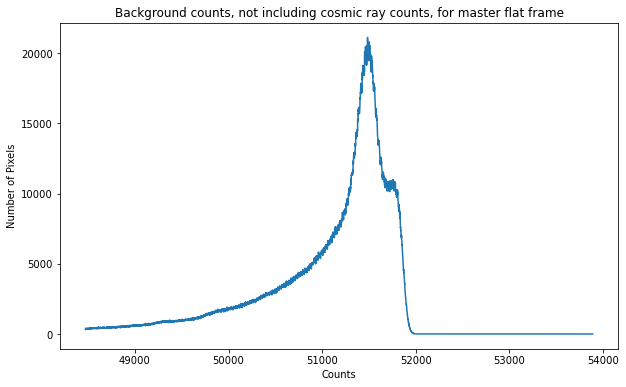

In [65]:
my_masterFlat = masterFlat*master_flat_median #rescaling the master flat by multiplying by the median
                                              #master_flat_median is the median of the original master flat, the one before rescaling
                                              #the variable master_flat_median is defined in the cell just below the heading 'Creating a Master Flat frame'  

mean, median, std = sigma_clipped_stats(my_masterFlat)
bins, num_pixels = get_background_histogram(my_masterFlat,mean-5*std,mean+5*std) #background counts, not including cosmic ray counts
plt.figure(figsize = (10,6))
plt.title("Background counts, not including cosmic ray counts, for master flat frame")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.plot(bins, num_pixels)
plt.show()

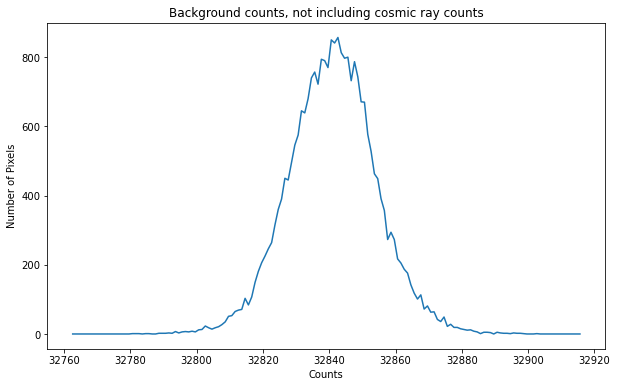

In [66]:
mean, median, std = sigma_clipped_stats(M3_data)
vmin = median - 5*std
vmax = median + 5*std
bins, num_pixels = get_background_histogram(M3_data[3100:3275, 2300:2450],vmin,vmax) #background counts, not including cosmic ray counts
plt.figure(figsize = (10,6))
plt.title("Background counts, not including cosmic ray counts")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.plot(bins, num_pixels)
plt.show()

In [67]:
hdul = fits.open('Messier3_transient.proc.fits')
M3_trans_data = hdul[0].data

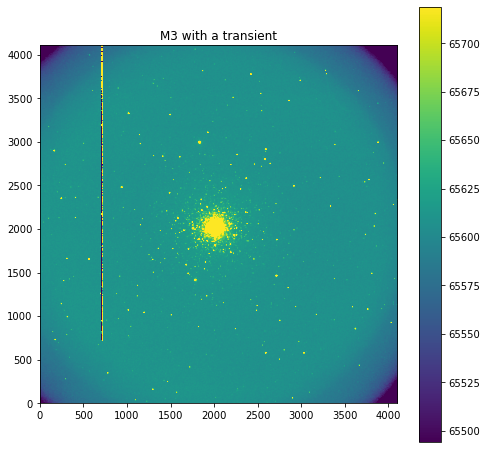

In [68]:
plt.figure(figsize = (8,8))
mean, median, std = sigma_clipped_stats(M3_trans_data)
plt.imshow(M3_trans_data, vmin = median - 5*std, vmax = median + 5*std, origin = "lower")
plt.title("M3 with a transient")
plt.colorbar()

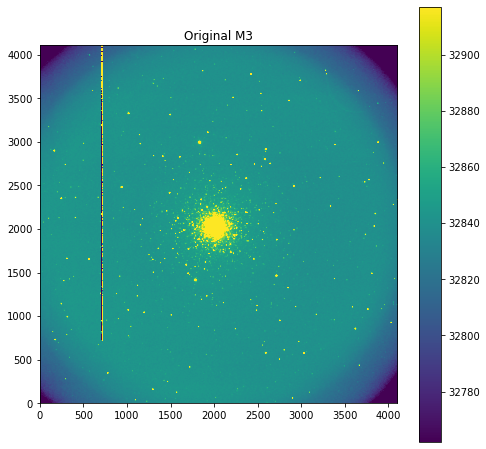

In [69]:
plt.figure(figsize = (8,8))
mean, median, std = sigma_clipped_stats(M3_data)
plt.imshow(M3_data, vmin = median - 5*std, vmax = median + 5*std, origin = "lower")
plt.title("Original M3")
plt.colorbar()

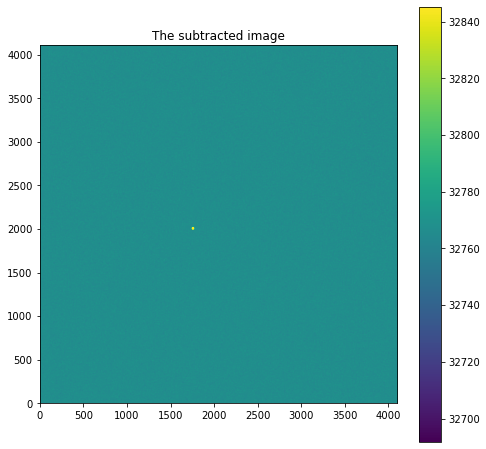

In [70]:
sub_image = M3_trans_data - M3_data
mean, median, std = sigma_clipped_stats(sub_image)

plt.figure(figsize = (8,8))
mean, median, std = sigma_clipped_stats(sub_image)
plt.imshow(sub_image, vmin = median - 5*std, vmax = median + 5*std, origin = "lower")
plt.title("The subtracted image")
plt.colorbar()
#the transient is clearly visible